In [1]:
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import json
#"key"=api_key
from config import api_key

# Data Exploration


This section contains the code used to retrieve the data from the APIs 

In [33]:
#Huntley's Code Starts here
#Returns games in the selected genre. Requires *genre* parameter. 
new_url = 'https://steamspy.com/api.php?request=genre&genre=action' 
response = requests.get(new_url).json()
response
action_df = pd.DataFrame(response).T
#action_df

In [34]:
#Steps to create a clean data frame with all of the data from the action genre
#action_df = action_df.reset_index()
#del action_df['index']
#del action_df['level_0']
action_df.head()
#action_df.to_csv('Action_Genre_Data.csv', index=False)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1529022,316017,0,"200,000,000 .. 500,000,000",35375,1411,907,672,0,0,0,856261
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,5933800,785996,0,"50,000,000 .. 100,000,000",28622,719,6242,273,0,0,0,921319
578080,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,1183722,907912,0,"50,000,000 .. 100,000,000",22157,608,6209,236,0,0,0,380112
1063730,1063730,New World,Amazon Games,Amazon Games,,161815,74378,0,"50,000,000 .. 100,000,000",7567,835,3831,224,3999,3999,0,47157
440,440,Team Fortress 2,Valve,Valve,,845304,57365,0,"50,000,000 .. 100,000,000",8647,1093,338,327,0,0,0,90729


In [26]:
#Create a player count Table using the AppID url times out so used iloc and tracked the index to start new runs
app_count = [] 
appid_list = []
#Used to test the for loop21166:24777
# test_df = action_df.head()
#created to iterate through different portions of the action_df before connection to site errors out
set_df = action_df.iloc[21166:24777,0:2]

# search for player count by appid  
#url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"

for index, row in set_df.iterrows():
    appid = row['appid'] 
    name = row['name']
   
    print(f'checking index {index} AppId {appid} , Name {name}')
    
    params = {'appid': appid}
    url = "https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/"
    
    response = requests.get(url, params=params).json()
    try:
        player_count = response['response']['player_count']
    
    except Exception as e:
        
        print("did not find count") 
        
    app_count.append(player_count)
    appid_list.append(appid)

In [6]:
#Create DF with appid and player count 
combineddata = {'appid':appid_list, 'player count':app_count}
combined_list_df = pd.DataFrame(combineddata)

combined_list_df

new_combined_df = pd.merge(combined_list_df,action_df, how="left", on=['appid','appid'])
new_combined_df.head()

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,529100,0,Omni Link,Roencia,Roencia Game Creators,,36,4,0,"0 .. 20,000",0,0,0,0,399,399,0,0
1,513920,0,Desperate Times,Yokcos,Yokcos,,8,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0
2,530740,0,Spareware,Rusto,Rusto,,20,7,0,"0 .. 20,000",0,0,0,0,0,0,0,0
3,527330,0,Grave: VR Prologue,"Broken Window Studios, LLC","Broken Window Studios, LLC",,5,12,0,"0 .. 20,000",0,0,0,0,799,799,0,0
4,529280,0,TEOT - The End OF Tomorrow,"Edsenses Creative Co., Ltd","Edsenses Creative Co., Ltd",,9,9,0,"0 .. 20,000",0,0,0,0,399,399,0,0


In [7]:
updated_data_types = {'average_forever': float, 'average_2weeks': float, 'median_forever': float, 'negative':float, 'positive': float,
                      'median_2weeks': float,'price': float, 'initialprice': float, 'discount': float, 'ccu': float}

new_combined_df = new_combined_df.astype(updated_data_types)
#new_combined_df.to_csv('AppID_PlayerCount_7.csv', index=False) 
new_combined_df

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,529100,0,Omni Link,Roencia,Roencia Game Creators,,36.0,4.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,399.0,399.0,0.0,0.0
1,513920,0,Desperate Times,Yokcos,Yokcos,,8.0,2.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,499.0,499.0,0.0,0.0
2,530740,0,Spareware,Rusto,Rusto,,20.0,7.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,527330,0,Grave: VR Prologue,"Broken Window Studios, LLC","Broken Window Studios, LLC",,5.0,12.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,799.0,799.0,0.0,0.0
4,529280,0,TEOT - The End OF Tomorrow,"Edsenses Creative Co., Ltd","Edsenses Creative Co., Ltd",,9.0,9.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,399.0,399.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,544380,0,Tesla: The Weather Man,"Thoughtquake Studios, LLC","Thoughtquake Studios, LLC",,6.0,1.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,299.0,299.0,0.0,0.0
3739,831520,0,Jurassic City Walk,Real Fighting,Real Fighting,,4.0,21.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3740,834340,0,The Hardest Dungeon,Pippala Games,Pippala Games,,16.0,4.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3741,818670,0,Save Snegurochka!,TIPA Games Berlin,TIPA Games Berlin,,5.0,0.0,0,"0 .. 20,000",0.0,0.0,0.0,0.0,899.0,899.0,0.0,0.0


In [36]:
#read in each of the csv files created
appid_playercount = pd.read_csv('./AppID_PlayerCount.csv')
appid_playercount2 = pd.read_csv('./AppID_PlayerCount_2.csv')
appid_playercount3 = pd.read_csv('./AppID_PlayerCount_3.csv')
appid_playercount4 = pd.read_csv('./AppID_PlayerCount_4.csv')
appid_playercount5 = pd.read_csv('./AppID_PlayerCount_5.csv')
appid_playercount6 = pd.read_csv('./AppID_PlayerCount_6.csv')
appid_playercount7 = pd.read_csv('./AppID_PlayerCount_7.csv')

In [ ]:
#final_combined_df = pd.concat([appid_playercount,appid_playercount2, appid_playercount3, appid_playercount4, 
 #            appid_playercount5, appid_playercount6, appid_playercount7])
#Create merged dataframe
#final_combined_df.to_csv('Final_Combined_Data.csv', index=False)

# Final DataFrame and Group Code Starts Here

In [2]:
#Read in final data set
final_combined_data_df = pd.read_csv('./Final_Combined_DataF.csv')
final_combined_data_df.head()

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,price,initialprice,discount,ccu,Final Price_$,Initial Price_$,Discount_$,Total Score,Mark,Tier
0,570,368142,Dota 2,Valve,Valve,NaN,1522243,314225,0,"200,000,000 .. 500,000,000",...,0,0,0,624634,9.53,0.00,0.00,1836468,83%,A
1,730,378812,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,5926012,785171,0,"50,000,000 .. 100,000,000",...,0,0,0,747905,2.64,0.00,0.00,6711183,88%,B
2,578080,67089,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1182394,907360,0,"50,000,000 .. 100,000,000",...,0,0,0,256666,2.22,0.00,0.00,2089754,57%,B
3,1063730,40836,New World,Amazon Games,Amazon Games,NaN,161467,74422,0,"50,000,000 .. 100,000,000",...,3999,3999,0,52597,0.94,39.99,39.99,235889,68%,B
4,440,97140,Team Fortress 2,Valve,Valve,NaN,844446,57326,0,"50,000,000 .. 100,000,000",...,0,0,0,97510,1.04,0.00,0.00,901772,94%,B


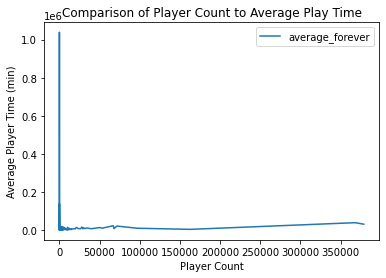

In [3]:
#Create charts to show relationships between SEAMS elements 
final_combined_df = final_combined_data_df.sort_values('player count', ascending=False)
x = final_combined_df
x.plot('player count', 'average_forever', kind='line', title='Comparison of Player Count to Average Play Time', xlabel='Player Count', ylabel='Average Player Time (min)')
#plt.savefig("Player v Average Play Time.png")

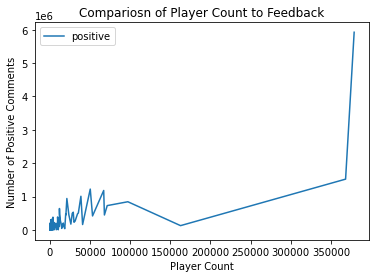

In [40]:
x.plot('player count', 'positive', kind='line', title='Compariosn of Player Count to Feedback', xlabel='Player Count', ylabel='Number of Positive Comments')
#plt.savefig("Player v Comments.png")

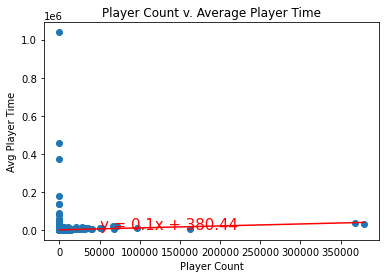

The correlation between both factors is 0.05


In [41]:
x.plot('player count', 'average_forever', kind='scatter', title='Scatter Plot of Average Play Time')
x_val = x.loc[:,"player count"]
y_val = x.loc[:,"average_forever"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(50000,5000),fontsize=15,color="red")
plt.title("Player Count v. Average Player Time")
plt.xlabel("Player Count")
plt.ylabel("Avg Player Time")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.savefig("Player Count v Avg Player Time.png")

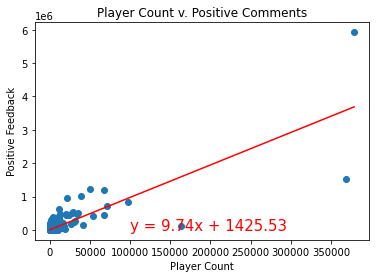

The correlation between both factors is 0.82


In [42]:
x.plot('player count', 'positive', kind='scatter', title='Scatter Plot of Average Play Time')
x_val = x.loc[:,"player count"]
y_val = x.loc[:,"positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(100000,5000),fontsize=15,color="red")
plt.title("Player Count v. Positive Comments")
plt.xlabel("Player Count")
plt.ylabel("Positive Feedback")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#plt.savefig("Player Count v Positive Comments.png")

In [15]:
#Nico's code
# price and players
bar_users = final_combined_data_df.groupby("Tier")["player count"].sum()
final_price = final_combined_data_df.groupby("Tier")["Final Price_$"].mean()
x_tier = ["A","B","C","D","E","F","G","H","I","J","K","L","M"]

new_df = pd.DataFrame ({
    "avg_price": final_price,
    "players": bar_users
},
    index=x_tier)
new_df.head()

,avg_price,players
A,9.530000,368142
B,1.710000,583877
C,4.010588,624320
D,4.327419,207511
E,4.559118,199404


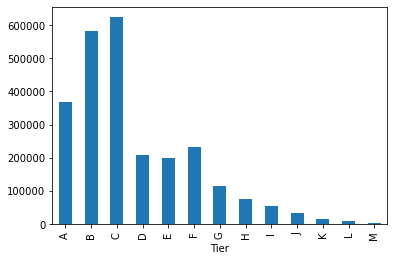

In [16]:
#Nico's code
bar_users = final_combined_data_df.groupby("Tier")["player count"].sum()
bar_users.plot(kind="bar")

plt.show()

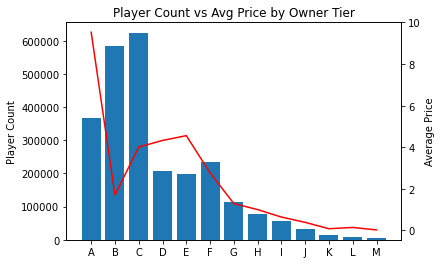

In [41]:
#Nico's code
fig, ax1 = plt.subplots()

ax1.bar(x_tier, bar_users)
ax1.set_ylabel("Player Count")

ax2 = ax1.twinx()
ax2.plot(x_tier, final_price, color="red")
ax2.set_ylabel("Average Price")
plt.title("Player Count vs Avg Price by Owner Tier")
plt.show()

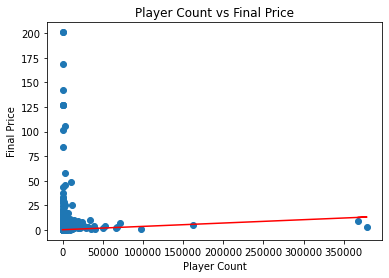

The correlation between both factors is 0.04


In [42]:
final_combined_data_df.plot('player count', 'Final Price_$', kind='scatter', title='Scatter Plot of Avg Price and Players ')
x_val = final_combined_data_df.loc[:,"player count"]
y_val = final_combined_data_df.loc[:,"Final Price_$"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
#plt.annotate(line_eq,(200000,20),fontsize=15,color="red")
plt.title("Player Count vs Final Price")
plt.xlabel("Player Count")
plt.ylabel("Final Price")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [43]:
# top 10 Df by price
trim_df=final_combined_data_df.nlargest(10, "Final Price_$")
trim_df[["Tier","developer","name", "player count", "Final Price_$"]]

,Tier,developer,name,player count,Final Price_$
6717,L,Geod Studio,3dSen PC,1,200.88
8108,M,BonusXP,Stranger Things 3: The Game,0,200.88
7597,L,Revmatek,Tree Simulator 2022,26,168.38
1421,I,Ninja Kiwi,Bloons Monkey City,291,142.30
1866,I,"USERJOY Technology Co.,Ltd.",Heroes of the Three Kingdoms,35,126.94
2588,J,Techland,Dying Light: Bad Blood,1,126.94
3189,J,Ovid Works,Interkosmos,0,126.94
8037,M,Bluedrake42 Limited Company,Iron Armada,0,126.94
167,F,CCP,EVE Online,2909,105.36
1404,I,Madmind Studio,SUCCUBUS: Prologue,32,102.04


In [44]:
# top 10 Df by players
trim_df=final_combined_data_df.nlargest(10, "player count")
trim_df[["Tier","developer","name", "player count", "Final Price_$"]]

,Tier,developer,name,player count,Final Price_$
1,B,"Valve, Hidden Path Entertainment",Counter-Strike: Global Offensive,378812,2.64
0,A,Valve,Dota 2,368142,9.53
12,C,Smilegate RPG,Lost Ark,162724,4.99
4,B,Valve,Team Fortress 2,97140,1.04
10,C,Facepunch Studios,Rust,71468,7.20
11,C,Respawn Entertainment,Apex Legends,67980,3.09
2,B,"KRAFTON, Inc.",PUBG: BATTLEGROUNDS,67089,2.22
19,C,Bungie,Destiny 2,53207,4.02
5,C,Rockstar North,Grand Theft Auto V,50354,1.86
3,B,Amazon Games,New World,40836,0.94


In [45]:
#final_combined_data_df["Mark"].dtypes
avg_rating=final_combined_data_df.groupby("Tier")["Mark"].mean()
avg_price = final_combined_data_df.groupby("Tier")["Final Price_$"].mean()
x_tier = ["A","B","C","D","E","F","G","H","I","J","K","L","M"]

new_df = pd.DataFrame ({
    "avg_price": avg_price,
    "avg_rating": avg_rating
},
    index=x_tier)
new_df.head()

TypeError: Could not convert 83% to numeric

NameError: name 'avg_price' is not defined

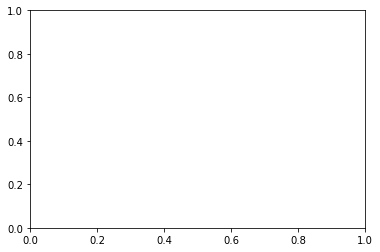

In [15]:
fig, ax1 = plt.subplots()

ax1.bar(x_tier, avg_price)
ax1.set_ylabel("Average Price")

ax2 = ax1.twinx()
ax2.plot(x_tier, avg_rating, color ="red")
ax2.set_ylabel("Average Rating")
plt.title("Average Rating vs Average Price by Owner Group")
plt.show()

In [16]:
new_df_rating= final_combined_data_df.dropna(subset=["Mark"])
#new_df_rating

TypeError: unsupported operand type(s) for /: 'str' and 'int'

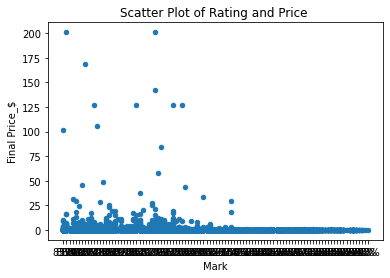

In [17]:
new_df_rating.plot('Mark', 'Final Price_$', kind='scatter', title='Scatter Plot of Rating and Price ')
x_val = new_df_rating.loc[:,"Mark"]
y_val = new_df_rating.loc[:,"Final Price_$"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq, (-.5,90), fontsize=15,color="red")
plt.title("Rating vs Final Price")
plt.xlabel("Rating")
plt.ylabel("Final Price")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [23]:
players = final_combined_data_df["player count"].sum()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

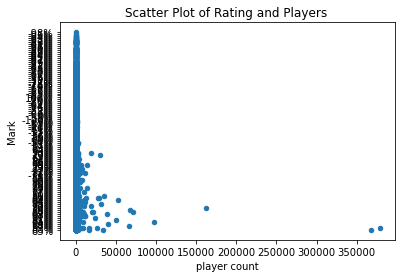

In [24]:
final_combined_data_df.plot('player count', 'Mark', kind='scatter', title='Scatter Plot of Rating and Players ')
x_val = final_combined_data_df.loc[:,"player count"]
y_val = final_combined_data_df.loc[:,"Mark"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
#plt.annotate(line_eq,(200000,20),fontsize=15,color="red")
plt.title("Player Count vs Rating")
plt.xlabel("Player Count")
plt.ylabel("Rating")
plt.show()
correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
fig, ax1 = plt.subplots()

ax1.bar(x_tier, bar_users)
ax1.set_ylabel("Player Count")

ax2 = ax1.twinx()
ax2.plot(x_tier, avg_rating, color="red")
ax2.set_ylabel("Average Rating")
plt.title("Player Count vs Avg Rating by Owner Tier")
plt.show()

In [4]:
#Yi's code start here
df=pd.read_csv(r'Final_Combined_DataF.csv')

In [6]:
#compare median_2week and median_forever for each game
#replace all NaN to 0
df=df.fillna(0)
# df2=df[df['median_2weeks']>df['median_forever']]
df['median_range']=df['median_2weeks']-df['median_forever']
#sort by difference 
df=df.sort_values(by=['median_range'],ascending=[False])
df.head()

,appid,player count,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,initialprice,discount,ccu,Final Price_$,Initial Price_$,Discount_$,Total Score,Mark,Tier,median_range
1421,1252780,291,Bloons Monkey City,Ninja Kiwi,Ninja Kiwi,0.0,3781,339,0,"200,000 .. 500,000",...,0,0,296,142.30,0.0,0.0,4120,92%,I,14110
2588,766370,1,Dying Light: Bad Blood,Techland,Techland Publishing,0.0,2533,1085,0,"100,000 .. 200,000",...,0,0,1,126.94,0.0,0.0,3618,70%,J,12532
167,8500,2909,EVE Online,CCP,CCP,0.0,21302,7361,0,"2,000,000 .. 5,000,000",...,0,0,3892,105.36,0.0,0.0,28663,74%,F,10412
1404,1344350,32,SUCCUBUS: Prologue,Madmind Studio,Madmind Studio,0.0,4281,907,0,"200,000 .. 500,000",...,0,0,38,102.04,0.0,0.0,5188,83%,I,10151
64,466240,272,Deceit,World Makers,World Makers,0.0,66505,17722,0,"5,000,000 .. 10,000,000",...,0,0,703,84.41,0.0,0.0,84227,79%,E,8348


In [7]:
#Cut out top 100 game data
#df.head(1000)

In [8]:
#count how much games per tier
df_counts=df['Tier'].value_counts(sort=True,ascending=True)
Tiers=pd.DataFrame(df_counts)
df2 = Tiers.rename_axis('Tiers').reset_index()
df2

,Tiers,Tier
0,A,1
1,B,4
2,C,17
3,D,31
4,E,68
5,F,230
6,G,320
7,H,495
8,I,957
9,J,1079


In [9]:
#generate a dataframe sort by Tiers with average price and average difference playtime. 
list_com5=df2['Tiers']
game_count_list=[]
price_list=[]
mean_fen_list=[]
ccu_sum_list=[]
median_range_list=[]

for com in list_com5:
    df_tmp=df[df['Tier']==com]
    mean_price=df_tmp['price'].mean()
    price_list.append(mean_price)

    game_count=len(df_tmp['name'])
    game_count_list.append(game_count)

    median_range_mean=df_tmp['median_range'].mean()
    median_range_list.append(median_range_mean)

df_com5=pd.DataFrame({'game_count':game_count_list,'mean_price':price_list,'median_difference_mean':median_range_list},index=list_com5)
df_com5

,game_count,mean_price,median_difference_mean
Tiers,,,
A,1,0.000000,201.000000
B,4,999.750000,-4131.250000
C,17,979.588235,-1047.470588
D,31,874.322581,-270.419355
E,68,1613.588235,-245.455882
F,230,1594.782609,-209.952174
G,320,1638.768750,-306.450000
H,495,1278.032323,-321.989899
I,957,1041.185998,-735.590387


In [10]:
#Modify the mean_price and median_difference_mean value
df_com5['mean_price'] = round(df_com5['mean_price']) * 0.01
df_com5['median_difference_mean'] =round(df_com5['median_difference_mean'])
## Using reset_index to convert index to column
df3 = pd.DataFrame(df_com5)
df3 = df3.rename_axis('Tiers').reset_index()
df3

,Tiers,game_count,mean_price,median_difference_mean
0,A,1,0.00,201.0
1,B,4,10.00,-4131.0
2,C,17,9.80,-1047.0
3,D,31,8.74,-270.0
4,E,68,16.14,-245.0
5,F,230,15.95,-210.0
6,G,320,16.39,-306.0
7,H,495,12.78,-322.0
8,I,957,10.41,-736.0
9,J,1079,8.73,-479.0


Text(0, 0.5, 'Playtime Difference Mean')

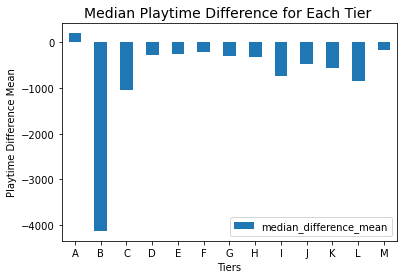

In [11]:
# Generate a bar plot showing the Total Current Online Player Each Tier using Pandas.
df3.plot.bar(x='Tiers', y='median_difference_mean',rot=0)
plt.title("Median Playtime Difference for Each Tier ", fontsize = 14)
plt.xlabel("Tiers")
plt.ylabel("Playtime Difference Mean")

In [12]:
#calculate how much percentage of games is increasing median play time over past two weeks
df4=df[df['median_2weeks']>df['median_forever']]
games_increase_playtime=len(df4['name'])
percent=int(games_increase_playtime)/len(df['name'])
percentage = round(percent*100)
print(f'There are {percentage }% of the games increased median playtime in past two weeks')

There are 1% of the games increased median playtime in past two weeks


## Regression and Correlation for reference: Player Count vs Final Price

The correlation between Player Count and Final Price is 0.04


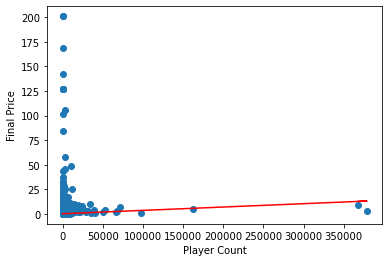

In [36]:
import scipy.stats as st

corr=round(st.pearsonr(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'])[0],2)
print(f"The correlation between Player Count and Final Price is {corr}")
model = st.linregress(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'])

y_values = final_combined_data_df['player count']*model[0]+model[1]
plt.scatter(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'])
plt.plot(final_combined_data_df['player count'],y_values,color="red")
plt.xlabel('Player Count')
plt.ylabel('Final Price')
plt.show()

In [37]:
players_prices_df = final_combined_data_df.loc[:, ['player count', 'Final Price_$']]

In [38]:
corr = players_prices_df.corr()
corr

,player count,Final Price_$
player count,1.000000,0.039922
Final Price_$,0.039922,1.000000


In [39]:
corr.style.background_gradient(cmap ='coolwarm')

,player count,Final Price_$
player count,1.000000,0.039922
Final Price_$,0.039922,1.000000


## Hypothesis - If the number of players in a game is related to the price of a game, then price is a factor of game popularity.

### Null Hypothesis - Price of a game is a factor in game popularity.

### Alternative Hypothesis - Price of a game is NOT a factor in game popularity.

In [40]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(final_combined_data_df['player count'],final_combined_data_df['Final Price_$'], 
                      equal_var=False)
print(f"t is {t_stat:.2f} while p is {p_val:.6f}")
if p_val < 0.05:
    print('Null hypothesis is rejected and Alternative Hypothesis is true.')
else:
    print('P = 0.99 and is > 0.05 so the Null Hypothesis is true.')

t is 4.26 while p is 0.000020
Null hypothesis is rejected and Alternative Hypothesis is true.
